<a href="https://colab.research.google.com/github/iu-data-science-python-i590/final-project-team-python-trio/blob/master/Phase2/final_project_phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analysis of K-means Clustering on Wisconsin Breast Cancer Data

Phase 2.0 | 2018 November 13

Bill Screen, Ha-Lan Nguyen, Tarun Rawat | Indiana University | M.S. Data Science

#### PROBLEM STATEMENT: 
Breast cancer is a rising issue among women. A cancer’s stage is a crucial factor in deciding what treatment options to recommend, and in determining the patient’s prognosis. Today, in the United States, approximately one in eight women over their lifetime has a risk of developing breast cancer. An analysis of the most recent data has shown that the survival rate is 88% after 5 years of diagnosis and 80% after 10 years of diagnosis. With early detection and treatment, it is possible that this type of cancer will go into remission. In such a case, the worse fear of a cancer patient is the recurrence of the cancer.

#### OBJECTIVE: 
This report will demonstrate how implementing a "k-means" algorithm can be used to classify benign and malign cells in two different groups.

#### Import Libraries

In [0]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import statistics
from statistics import stdev
from statistics import mean
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#### Load Data

In [0]:
# Load data file into pandas Dataframe
df = pd.read_csv('breast-cancer-wisconsin.csv')

# Inspect data
print(df.sample(n=10))

         Scn  A2  A3  A4  A5  A6  A7  A8  A9  A10  CLASS
192  1212232   5   1   1   1   2   1   2   1    1      2
222  1226012   4   1   1   3   1   5   2   1    1      4
451  1202253   5   1   1   1   2   1   1   1    1      2
466  1298416  10   6   6   2   4  10   9   7    1      4
116  1173347   8   3   3   1   2   2   3   2    1      2
352   846832   3   4   5   3   7   3   4   6    1      2
156  1193091   1   2   2   1   2   1   2   1    1      2
664  1345593   3   1   1   3   2   1   2   1    1      2
178  1202125   4   1   1   1   2   1   3   1    1      2
527   798429   4   1   1   1   2   1   3   1    1      2


#### Impute missing values

In [0]:
# Set NA character
na_value_char = '?' 

# Check the number of NaN values in the DataFrame before replacement of ? with NaN
print('\n Column A7 contains {0} NaN rows before replacement'.format(df['A7'].isnull().sum()))

# Replace ? by NaN in column A7
df['A7'].replace(na_value_char, value=np.NaN, inplace=True)

# Convert column A7 back to numeric
df['A7'] = pd.to_numeric(df['A7'])

# Check the number of NaN values in the DataFrame after replacement of ? with NaN
print('\n Column A7 contains {0} NaN rows after replacement'.format(df['A7'].isnull().sum()))

# Replace NaN values with the mean of column A7 to the entire DataFrame
df.fillna((df.mean(skipna=True)), inplace=True)

# Convert all columns of DataFrame
df = df.apply(pd.to_numeric)

# Check the number of NaN values in the DataFrame after replacement of NaN with Mean
print('\n Column A7 contains {0} NaN rows after replacement of NaN with Mean'.format(df['A7'].isnull().sum()))


 Column A7 contains 0 NaN rows before replacement

 Column A7 contains 16 NaN rows after replacement

 Column A7 contains 0 NaN rows after replacement of NaN with Mean


#### Use KMeans algorithm

In [0]:
# Use only columns A2-A10
data = df.loc[:, 'A2':'A10']

# Use KMeans algorithm
kmeans = KMeans(n_clusters=4)

# Fit model to your data
kmeans.fit(data)
           
# Calculate centroids
centroids = kmeans.cluster_centers_

# Print centroids
print('\n Calculated centroids:\n {0}'.format(pd.DataFrame(centroids)))

# Validate expected centroids array is 4 x 9 matrix
cluster_shape_assert = (centroids.shape[0] == kmeans.n_clusters and centroids.shape[1] == len(data.columns))
print('\nThe centroids array is a 4 x 9 matrix: {0}'.format(cluster_shape_assert))


 Calculated centroids:
           0         1         2         3         4         5         6  \
0  2.944934  1.244493  1.365639  1.292952  2.039648  1.351401  2.061674   
1  6.762500  8.387500  8.425000  7.750000  6.775000  9.212500  7.375000   
2  7.464789  7.028169  6.676056  4.197183  5.535211  3.453220  5.380282   
3  7.234043  4.851064  5.042553  4.861702  4.117021  9.382979  5.265957   

          7         8  
0  1.200441  1.077093  
1  7.737500  3.787500  
2  6.816901  2.309859  
3  3.787234  1.648936  

The centroids array is a 4 x 9 matrix: True


#### Inspect clusters

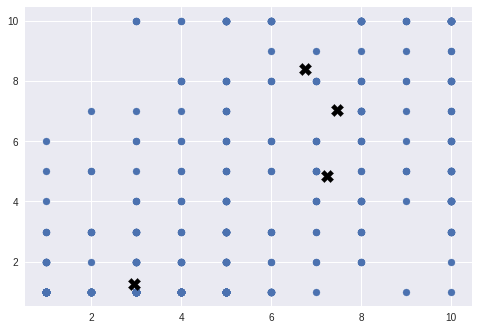

In [0]:
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(data.A2, data.A3)
plt.scatter(centroids_x, centroids_y, marker = 'X', s=150, c='black')

#### Find the optimal number of clusters

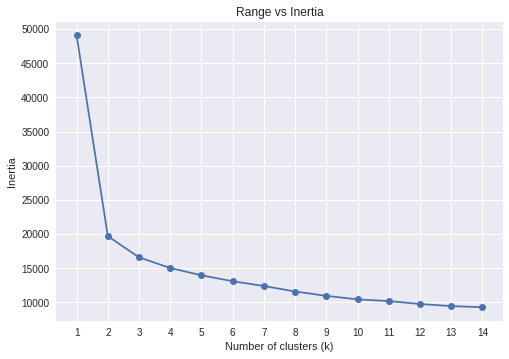

In [0]:
# Create a range from 1 to 15 or more
ks = range(1, 15)

# Create an empty list for inertias values
inertias = []

# Use for loop to calculate KMeans for each values
for k in ks:
    
    # Create new model with k clusters
    model = KMeans(n_clusters=k)
    
    # Fit model
    model.fit(data)    
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot range and inertia
plt.plot(ks, inertias, '-o')

# Add title, ylabel, xlabel
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Range vs Inertia')
plt.xticks(ks)
plt.show()

#### In your final project - explain how to determine the  best number of clusters

**TODO: I like this explanation - let's rewrite and simplify **

One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE)

...plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. 

The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (***the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster***). 

So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

https://bl.ocks.org/rpgove/0060ff3b656618e9136b



#### Revise data variation

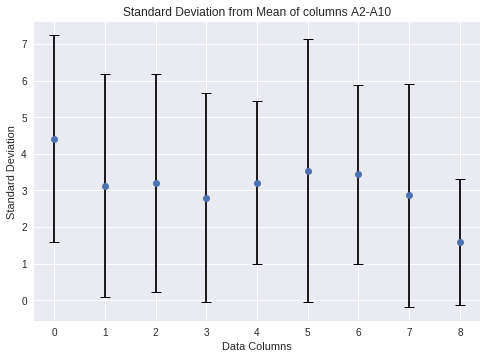

In [0]:
# Apply standard deviation function for columns A2-A10
data_stdev = data.apply(stdev,axis=0)
data_mean = data.apply(mean,axis=0)
x = np.arange(len(data_mean))

# Plot standard deviation values
# --- Select a graphic that could display all nine values [do not use histogram]
# --- Add title, legend, ylabel, xlabel. 
# --- Can you capture how wide or narrow is the variation in each column?
fig, ax = plt.subplots()
plt.title('Standard Deviation from Mean of columns A2-A10')
plt.ylabel('Standard Deviation')
plt.xlabel('Data Columns')
ax.errorbar(x, data_mean, yerr=data_stdev, marker='o', linestyle='none', capsize=5, capthick=1, ecolor='black')
plt.show()

# print(data_means)
# print(data_stdev)
# print(data.columns)

# Describe which features have a lot of data variation
# TODO: ADD DESCRIPTION HERE

#### Implement normalization

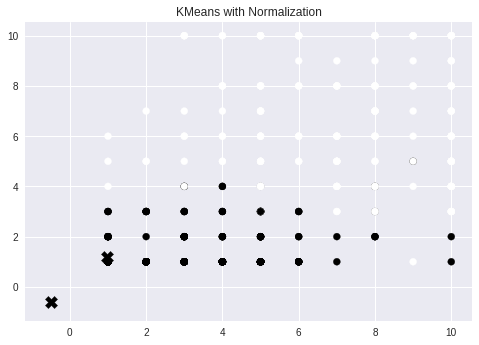

In [0]:
# Use the n_cluster based on the optimal number you have identified from Inertia

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=2) # Using value of 2 based on Elbow method

# Create StandardScaler instance: scaler
scaler = StandardScaler()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)
pipeline.fit(data)
labels = pipeline.predict(data)

# Find centroids and print them

# Calculate centroids
centroids = kmeans.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
# plt.scatter(data.A2, data.A3, c=labels)
plt.scatter(data.A2, data.A4, c=labels)
plt.scatter(centroids_x, centroids_y, marker='X', s=150, c='black')
plt.title('KMeans with Normalization')
plt.show()